## Data load - 롯데멤버스 백화점 소비, 고객 데이터 (데이터셋 원본은 서약 상 비공개)

In [8]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import gc
%matplotlib inline
rc('font', family='malgun gothic')
rc('axes', unicode_minus=False)
%matplotlib inline

In [9]:
tran= pd.read_csv('구매내역정보.csv', engine='python', encoding = 'cp949')
demo= pd.read_csv('Demo.csv', engine='python', encoding='cp949')
silver = pd.merge(demo, tran, on='ID')

#필요없는 데이터 삭제
del tran, demo
gc.collect()

56

## 75세 이상은 구매액 많지 않으므로 정제

In [10]:
silver_low = silver.query("연령 <= 75")

## Bravo Lifestyle의 특성을 반영한 RFM 분석
### - Brankable 특성

In [11]:
# 거주지역 단위 분리
city_Gu = silver_low['거주지역'].str.split()
silver_low['City'] = city_Gu.str.get(0) 
silver_low['Gu'] = city_Gu.str.get(1)
silver_low

C:\Users\wodnj\AppData\Local\Temp\ipykernel_37352\708772687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  silver_low['City'] = city_Gu.str.get(0)
C:\Users\wodnj\AppData\Local\Temp\ipykernel_37352\708772687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  silver_low['Gu'] = city_Gu.str.get(1)


,ID,성별,연령,거주지역,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부,City,Gu
1860,242409444,2,75,경기 양평군,식품,가공식품,경기 구리시,20140818,11,1,8000,0,경기,양평군
1861,242409444,2,75,경기 양평군,식품,가공식품,경기 구리시,20140818,11,2,23000,0,경기,양평군
1862,242409444,2,75,경기 양평군,의류잡화,여성용의류-SPA,경기 구리시,20140514,11,1,9000,0,경기,양평군
1863,242409444,2,75,경기 양평군,의류잡화,여성용의류-SPA,서울 중구,20140403,11,1,106000,0,경기,양평군
1864,242409444,2,75,경기 양평군,의류잡화,패션잡화,경기 구리시,20140818,11,1,38000,0,경기,양평군
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101687,955481370,2,58,경기 의왕시,의류잡화,남성용의류-정장류,경기 안양시,20141225,19,1,60000,0,경기,의왕시
101688,955481370,2,58,경기 의왕시,의류잡화,패션잡화,경기 안양시,20141225,19,3,93000,0,경기,의왕시
101689,955481370,2,58,경기 의왕시,가전제품,생활가전,경기 안양시,20141212,20,1,1057000,0,경기,의왕시
101690,821581510,2,64,경기 안양시,식품,가공식품,경기 광명시,20141221,12,1,5000,0,경기,안양시


In [12]:
# m - 구매고객별 구매금액
monetary = silver_low.groupby('ID')['구매금액'].agg([('monetary', np.sum)]).reset_index()
monetary

C:\Users\wodnj\AppData\Local\Temp\ipykernel_37352\2073118827.py:2: FutureWarning: The provided callable <function sum at 0x000001DF50304360> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  monetary = silver_low.groupby('ID')['구매금액'].agg([('monetary', np.sum)]).reset_index()


,ID,monetary
0,909249,640000
1,1065068,1103000
2,1310410,249000
3,1387032,113000
4,1529116,66000
...,...,...
3427,998623524,2088000
3428,999024423,25000
3429,999184958,3147000
3430,999375162,10762000


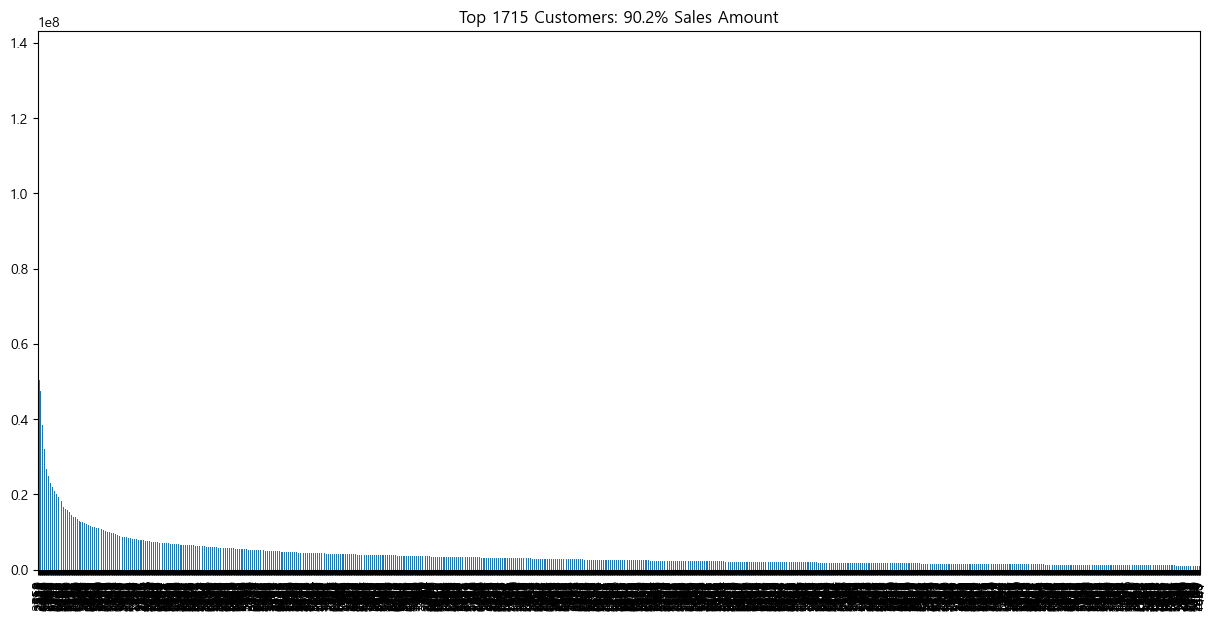

In [13]:
# 특정 인원의 구매금액 집중 확인
plt.figure(figsize=(15, 7))

top_n = 1715
percent_sales = (monetary.monetary.sort_values(ascending=False).iloc[:top_n].sum() / monetary.monetary.sum()).round(3)
monetary.monetary.sort_values(ascending=False).iloc[:top_n].plot.bar(title=f'Top {top_n} Customers: {percent_sales:.1%} Sales Amount')
plt.show()

In [15]:
# 구매일자 type 변환
silver_low['구매일자']=silver_low['구매일자'].astype('str').astype('datetime64[ns]')

C:\Users\wodnj\AppData\Local\Temp\ipykernel_37352\4120300529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  silver_low['구매일자']=silver_low['구매일자'].astype('str').astype('datetime64[ns]')


In [16]:
# Recency  - 최근 구매일
# 최종 구매일 다음날을 기준으로 계산 
#9월 30일이면 1, 9월 29일이면 2
#예를 들어 recency가 1인 경우는 9월 30일까지 구매한 것
#recency가 적을수록 vvip고객으로 판단(최근까지 구매한것으로)
now = silver_low.구매일자.max()+pd.DateOffset(days=1)
recency = (silver_low.groupby('ID')['구매일자']
           .agg(lambda x,y: (y - x).min().days, now).reset_index()
           .rename(columns={'구매일자':'recency'})
          )
recency

,ID,recency
0,909249,7
1,1065068,3
2,1310410,81
3,1387032,31
4,1529116,2
...,...,...
3427,998623524,3
3428,999024423,42
3429,999184958,77
3430,999375162,11


In [17]:
# frequency - 구매 빈도
frequency = silver_low.groupby('ID')['구매지역'].agg([('frequency','count')]).reset_index()
frequency

,ID,frequency
0,909249,29
1,1065068,11
2,1310410,2
3,1387032,6
4,1529116,5
...,...,...
3427,998623524,19
3428,999024423,3
3429,999184958,26
3430,999375162,50


In [18]:
# 구매 금액과 연결
rfm = recency.merge(frequency).merge(monetary)
rfm

,ID,recency,frequency,monetary
0,909249,7,29,640000
1,1065068,3,11,1103000
2,1310410,81,2,249000
3,1387032,31,6,113000
4,1529116,2,5,66000
...,...,...,...,...
3427,998623524,3,19,2088000
3428,999024423,42,3,25000
3429,999184958,77,26,3147000
3430,999375162,11,50,10762000


In [19]:
#RFM 테이블 생성 - 분위수를 기준으로 int형 가중치 생성
rfm['R'] = pd.qcut(rfm['recency'], q=5, labels=range(5,0,-1)).astype(int)
rfm['F'] = pd.qcut(rfm['frequency'], q=5, labels=range(1,6)).astype(int)
rfm['M'] = pd.qcut(rfm['monetary'], q=5, labels=range(1,6)).astype(int)
rfm

,ID,recency,frequency,monetary,R,F,M
0,909249,7,29,640000,5,4,2
1,1065068,3,11,1103000,5,3,3
2,1310410,81,2,249000,1,1,1
3,1387032,31,6,113000,3,2,1
4,1529116,2,5,66000,5,2,1
...,...,...,...,...,...,...,...
3427,998623524,3,19,2088000,5,4,4
3428,999024423,42,3,25000,2,1,1
3429,999184958,77,26,3147000,2,4,5
3430,999375162,11,50,10762000,4,5,5


In [20]:
# 문자열 변환을 통한 고유 그룹 생성
rfm['RFMgroup'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm

,ID,recency,frequency,monetary,R,F,M,RFMgroup
0,909249,7,29,640000,5,4,2,542
1,1065068,3,11,1103000,5,3,3,533
2,1310410,81,2,249000,1,1,1,111
3,1387032,31,6,113000,3,2,1,321
4,1529116,2,5,66000,5,2,1,521
...,...,...,...,...,...,...,...,...
3427,998623524,3,19,2088000,5,4,4,544
3428,999024423,42,3,25000,2,1,1,211
3429,999184958,77,26,3147000,2,4,5,245
3430,999375162,11,50,10762000,4,5,5,455


In [21]:
# R,F,M 에 대한 중요도를 고려하여 RFM Score 계산
weights = [4, 2, 6]
# R,M이 더 중요도가 높다고 판단
rfm['RFMscore'] = weights[0] * rfm['R'] + weights[1] * rfm['F'] + weights[2] * rfm['M']
rfm.sort_values(by='RFMscore',ascending=False)

,ID,recency,frequency,monetary,R,F,M,RFMgroup,RFMscore
1405,412215156,2,60,7248000,5,5,5,555,60
2507,753084335,5,91,4056000,5,5,5,555,60
1896,557118245,6,72,4799000,5,5,5,555,60
1889,555260477,6,69,3363000,5,5,5,555,60
1551,455516973,3,229,11200000,5,5,5,555,60
...,...,...,...,...,...,...,...,...,...
1246,366312114,235,2,97000,1,1,1,111,12
3079,907107144,166,2,131000,1,1,1,111,12
3076,906070531,254,3,25000,1,1,1,111,12
2259,669628758,135,2,149000,1,1,1,111,12


In [22]:
# RFM 군집이 모두 가장 높은 군집을 우선적으로 VIP로 분류 
vip=rfm.query("RFMgroup== '555'")
vip

,ID,recency,frequency,monetary,R,F,M,RFMgroup,RFMscore
7,2413953,7,131,4390000,5,5,5,555,60
45,11966063,5,60,3535000,5,5,5,555,60
50,13215076,3,87,6756000,5,5,5,555,60
58,15298598,2,201,16247000,5,5,5,555,60
73,20035388,3,78,4524000,5,5,5,555,60
...,...,...,...,...,...,...,...,...,...
3378,988927928,1,127,38500000,5,5,5,555,60
3403,994277985,4,76,4568000,5,5,5,555,60
3408,994677461,2,131,7616000,5,5,5,555,60
3415,995714590,7,85,7061000,5,5,5,555,60


In [23]:
# 원래 데이터와 merge
silver_vip = pd.merge(silver_low, vip, on='ID')
silver_vip

,ID,성별,연령,거주지역,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,...,City,Gu,recency,frequency,monetary,R,F,M,RFMgroup,RFMscore
0,307677989,2,75,경기 성남시,식품,가공식품,경기 성남시,2014-07-01,10,1,...,경기,성남시,4,70,3484000,5,5,5,555,60
1,307677989,2,75,경기 성남시,생활잡화,생활용품,경기 성남시,2014-07-03,11,2,...,경기,성남시,4,70,3484000,5,5,5,555,60
2,307677989,2,75,경기 성남시,식품,가공식품,경기 성남시,2014-12-14,11,1,...,경기,성남시,4,70,3484000,5,5,5,555,60
3,307677989,2,75,경기 성남시,식품,가공식품,경기 성남시,2014-12-14,11,1,...,경기,성남시,4,70,3484000,5,5,5,555,60
4,307677989,2,75,경기 성남시,식품,농산물,경기 성남시,2014-03-02,11,1,...,경기,성남시,4,70,3484000,5,5,5,555,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,489780146,1,57,서울 송파구,가전제품,주방가전,서울 송파구,2014-10-02,19,1,...,서울,송파구,4,88,5011000,5,5,5,555,60
26432,489780146,1,57,서울 송파구,식품,농산물,서울 송파구,2014-10-02,19,1,...,서울,송파구,4,88,5011000,5,5,5,555,60
26433,489780146,1,57,서울 송파구,의류잡화,여성용의류-SPA,서울 송파구,2014-05-17,19,1,...,서울,송파구,4,88,5011000,5,5,5,555,60
26434,489780146,1,57,서울 송파구,의류잡화,여성용의류-SPA,서울 송파구,2014-05-17,19,1,...,서울,송파구,4,88,5011000,5,5,5,555,60


In [24]:
#555중복 제거
silver_vip=silver_vip.drop_duplicates(['ID'])

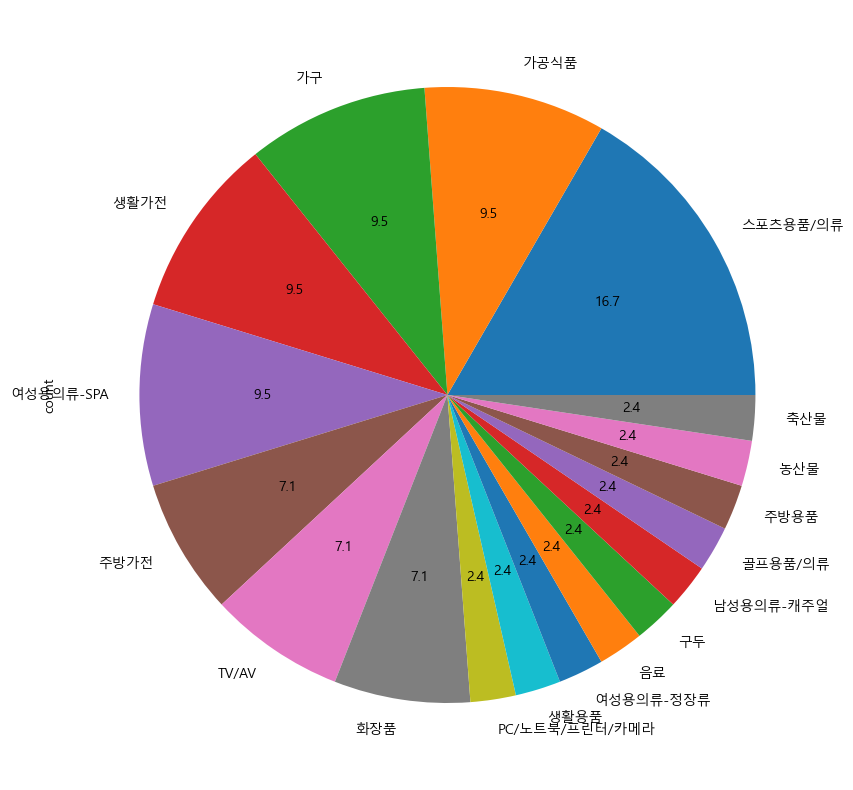

In [25]:
#부산지역 VIP의 구매 품목
silver_vip.query('City == "부산"').상품중분류명.value_counts().plot.pie(figsize=(10, 10), autopct='%.1f')
plt.show()

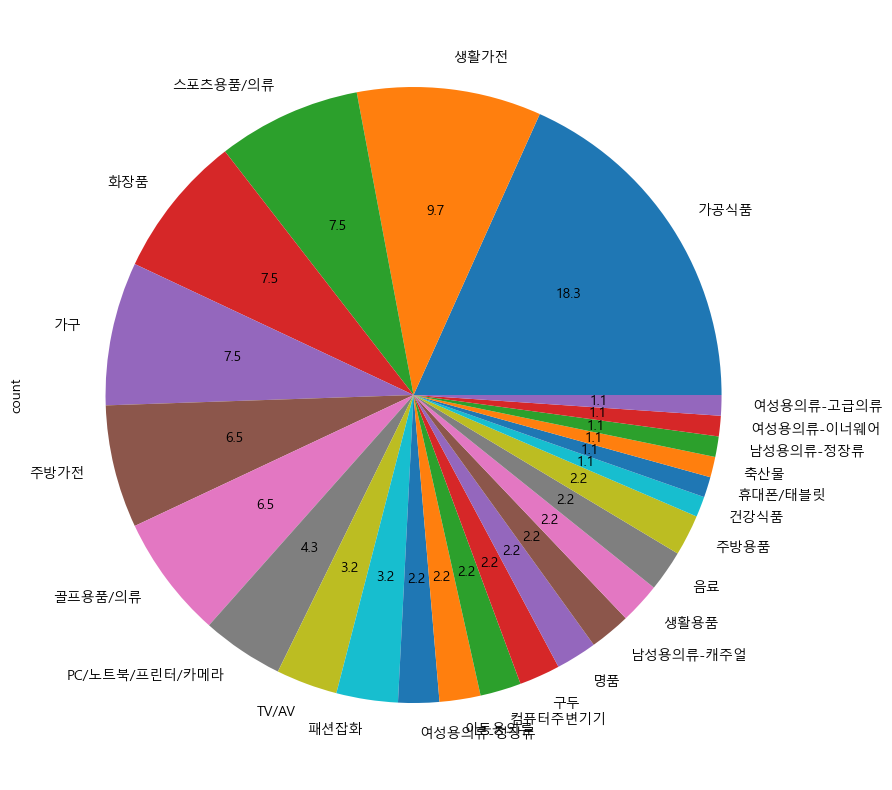

In [26]:
#서울지역 VIP의 구매 품목
silver_vip.query('City == "서울"').상품중분류명.value_counts().plot.pie(figsize=(10, 10), autopct='%.1f')
plt.show()

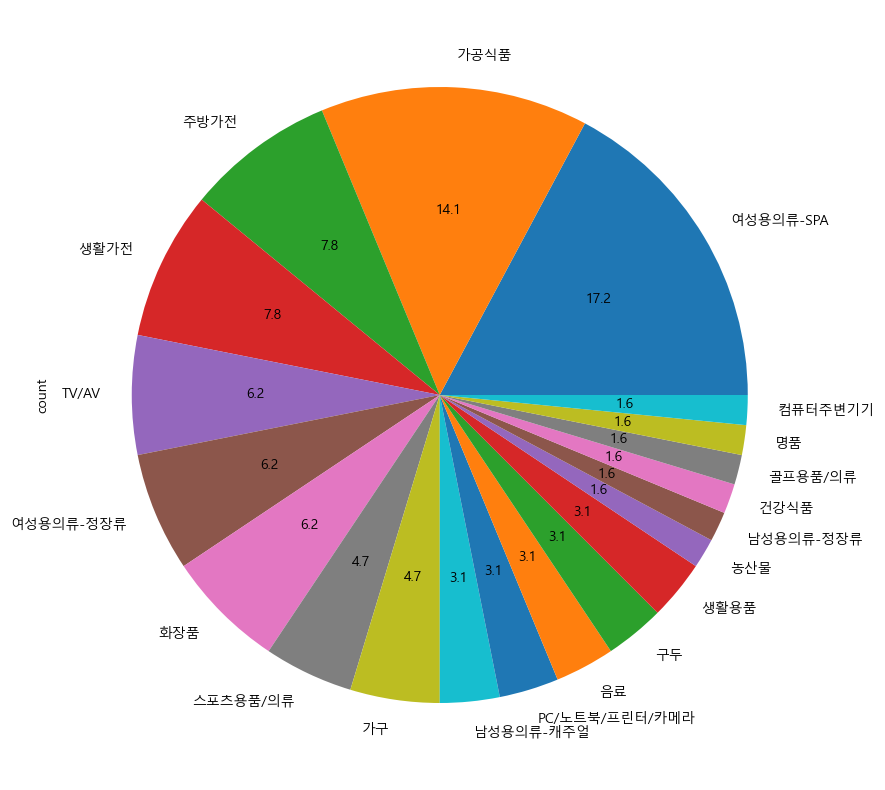

In [27]:
#경기지역 VIP의 구매 품목
silver_vip.query('City == "경기"').상품중분류명.value_counts().plot.pie(figsize=(10, 10), autopct='%.1f')
plt.show()

### - Relation 특성

In [28]:
# 성별 구분
silver_low['성별'] = silver_low['성별'].apply(lambda x: '남성' if x == 1 else '여성')

C:\Users\wodnj\AppData\Local\Temp\ipykernel_37352\303968661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  silver_low['성별'] = silver_low['성별'].apply(lambda x: '남성' if x == 1 else '여성')


In [29]:
#성별별 구매비율
sex = pd.pivot_table(silver_low, index = '상품중분류명', columns = '성별', values = '구매수량', aggfunc = np.sum, fill_value=0)

C:\Users\wodnj\AppData\Local\Temp\ipykernel_37352\1380856630.py:2: FutureWarning: The provided callable <function sum at 0x000001DF50304360> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sex = pd.pivot_table(silver_low, index = '상품중분류명', columns = '성별', values = '구매수량', aggfunc = np.sum, fill_value=0)


In [30]:
sex['남성'] = sex['남성'].apply(lambda x: x/sex['남성'].sum()*100)
sex['여성'] = sex['여성'].apply(lambda x: x/sex['여성'].sum()*100)

In [31]:
a = []
b = []
for i,v in zip(sex['남성'],sex['여성']):
    if i > v:
        a.append(i-v)
    else:
        a.append(v-i)

for i,v in zip(sex['남성'],sex['여성']):
    if i > v:
        b.append('남성')
    else:
        b.append('여성')
sex['비율 차이값'] = a 
sex['우위']=b

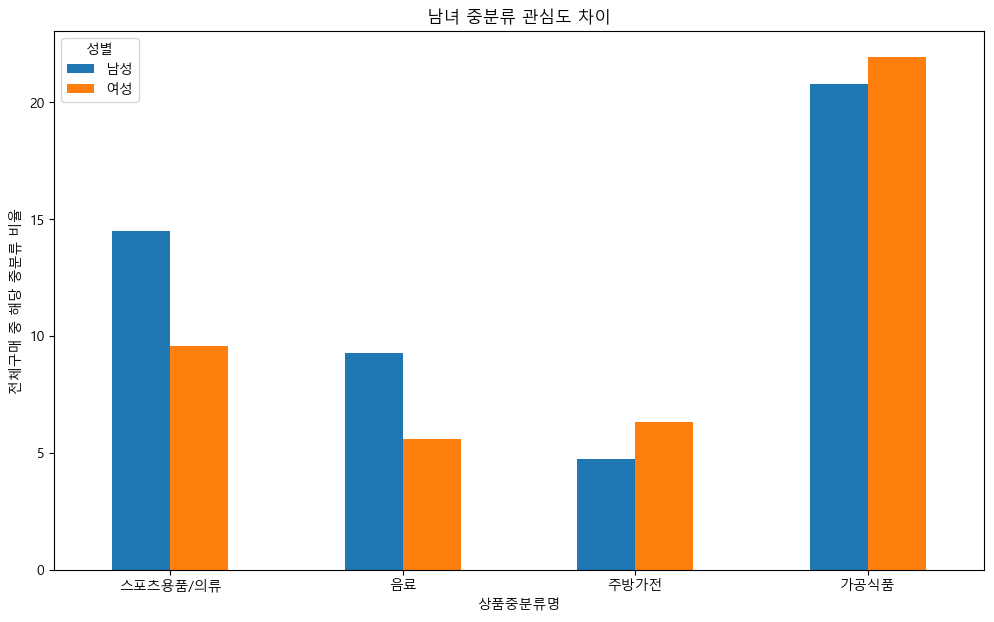

In [32]:
# 남녀 품목별 관심도 차이
sex.sort_values(by='비율 차이값', ascending = False)[['남성', '여성']].head(6).drop(['여성용의류-정장류','침구류']).plot.bar(figsize=(12,7))
plt.xticks(rotation=0)
plt.ylabel('전체구매 중 해당 중분류 비율')
plt.title('남녀 중분류 관심도 차이')
plt.show()

In [33]:
# http://biz.khan.co.kr/khan_art_view.html?artid=200905281350541&code=920401 동호회 장르 비율

In [34]:
# 전체 구매금액 중 스포츠용품 구매금액
silver_low.query('상품중분류명 == "스포츠용품/의류"').구매금액.sum()/silver_low.구매금액.sum()*100

4.7198203793054025

In [35]:
# 전체 구매건수  중 스포츠용품 구매건수
len(silver_low.query('상품중분류명 == "스포츠용품/의류"'))/len(silver_low)*100

6.16534046042641

In [36]:
# 잡코리아 비율 시각화
group = {'분야' : ['등산','축구','야구','족구'], '비율':[33.6, 29.5, 14.7, 5.4]}
group_df = DataFrame(group)
group_df

,분야,비율
0,등산,33.6
1,축구,29.5
2,야구,14.7
3,족구,5.4


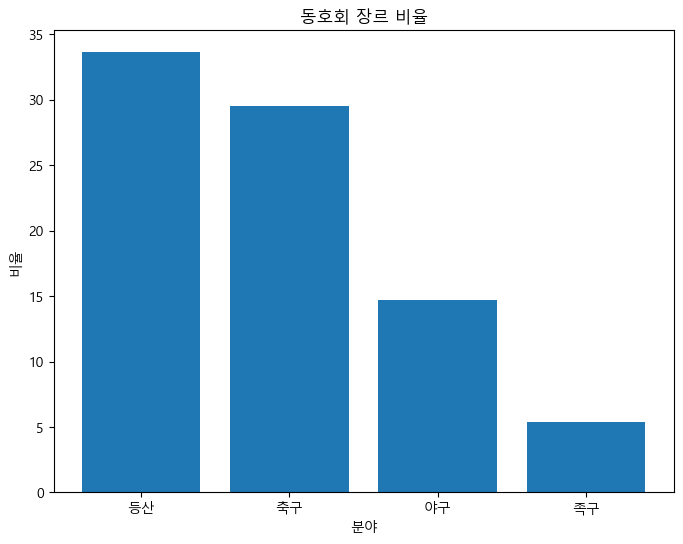

In [37]:
# 동호회 종목 비율
figure=plt.subplots(figsize=(8,6))
y = group_df['비율']
x = np.arange(len(y))
xlabel = ['등산', '축구', '야구', '족구']
plt.title("동호회 장르 비율")
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.xlabel("분야")
plt.ylabel("비율")
plt.show()

In [38]:
#상품별 취소비율
silver_cancel = silver_low.groupby('상품중분류명')['취소여부'].agg([('취소건수',np.sum)]).reset_index()
silver_cancel1 = silver_low.groupby('상품중분류명')['취소여부'].agg([('구매건수','size')]).reset_index()
silver_cancel2 = pd.merge(silver_cancel, silver_cancel1, on='상품중분류명')
silver_cancel2['취소비율'] = silver_cancel2.취소건수/silver_cancel2.구매건수 * 100

C:\Users\wodnj\AppData\Local\Temp\ipykernel_37352\2815142273.py:2: FutureWarning: The provided callable <function sum at 0x000001DF50304360> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  silver_cancel = silver_low.groupby('상품중분류명')['취소여부'].agg([('취소건수',np.sum)]).reset_index()


In [39]:
#취소율 상위품목
silver_cancel2.sort_values(by='취소비율', ascending = False, inplace=True)
silver_cancel2

,상품중분류명,취소건수,구매건수,취소비율
17,여성용의류-고급의류,383,1367,28.017557
24,주얼리,26,117,22.222222
19,여성용의류-정장류,856,3968,21.572581
26,침구류,220,1287,17.094017
5,골프용품/의류,292,1733,16.849394
10,명품,195,1188,16.414141
8,남성용의류-캐주얼,489,3128,15.632992
16,여성용의류-SPA,1813,12140,14.934102
14,스포츠용품/의류,906,6090,14.876847
6,구두,425,2911,14.599794


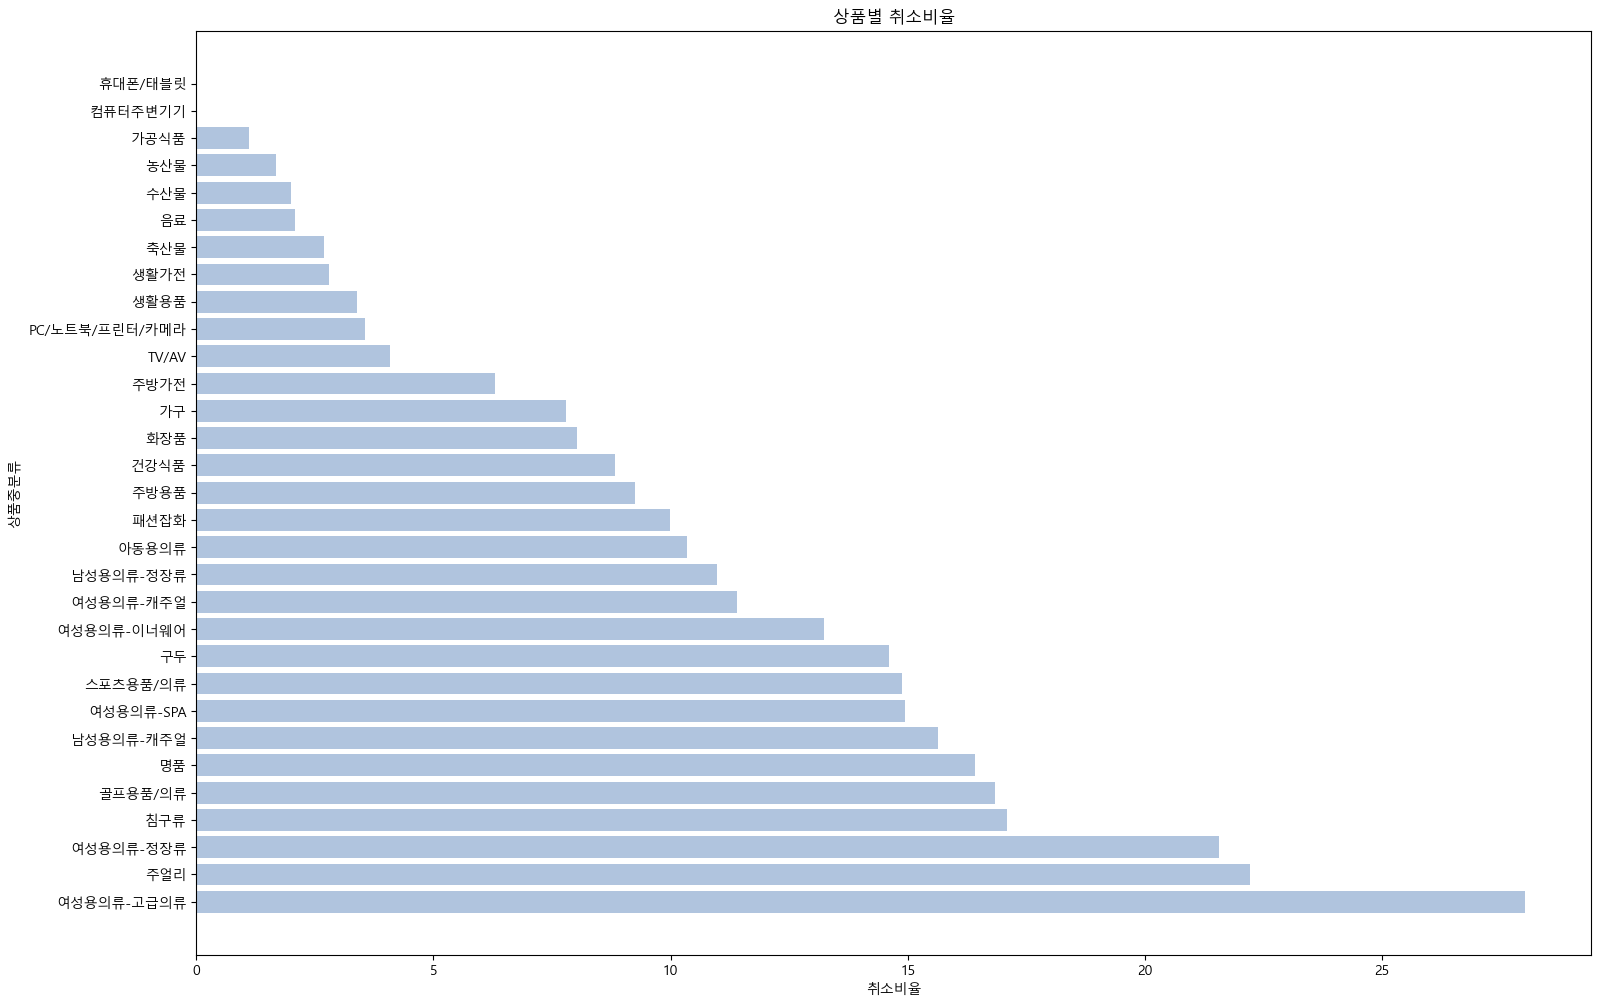

In [40]:
#취소율 상위품목 시각화
figure = plt.subplots(figsize=(18,12))
plt.barh(silver_cancel2.상품중분류명, silver_cancel2.취소비율, color='lightsteelblue', edgecolor='None')
plt.xlabel('취소비율')
plt.ylabel('상품중분류')
plt.title('상품별 취소비율')
plt.show()

### -  Active 특성

In [41]:
# 구매일자 및 구매요일 분리
a = silver_low['거주지역'].str.split(' ')
silver_low['지역'] = a.str.get(0)
silver_low['구'] = a.str.get(1)
silver_low['구매일자']=silver_low['구매일자'].astype('str').astype('datetime64')
silver_low['구매요일']=silver_low['구매일자'].apply(lambda x: ('월','화','수','목','금','토','일')[x.weekday()])
silver_low = silver_low.query("55<=연령<=75")

C:\Users\wodnj\AppData\Local\Temp\ipykernel_37352\1842222085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  silver_low['지역'] = a.str.get(0)
C:\Users\wodnj\AppData\Local\Temp\ipykernel_37352\1842222085.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  silver_low['구'] = a.str.get(1)


TypeError: Casting to unit-less dtype 'datetime64' is not supported. Pass e.g. 'datetime64[ns]' instead.

In [ ]:
# 거주지역별 대분류
df2 = pd.pivot_table(silver_low,
                     index = 'ID', 
                  columns = '상품대분류명', 
                  values = '거주지역', 
                  aggfunc = ['count'], 
                  fill_value = 0) 

def drop_column_level(data):
    c_list = []
    for _, c in data.columns:
        if not c:
            c_list.append(_)
        else:
            c_list.append(c)
    return c_list

df2.columns = drop_column_level(df2)
df2 = df2.reset_index()
df3 = df2[df2.columns[1:]]

# 품목별 상관성 분석
sns.heatmap(df3.corr(),
            cmap='YlGnBu',
           annot=True) 
plt.show()

In [ ]:
# 대분류가 식품인 구매 건들만 Sort
data = silver_low.query('상품대분류명=="식품"')

In [ ]:
# 식품군과 구매요일의 상관성 분석
df4 = pd.pivot_table(data,
                     index = '구매요일', 
                  columns = '상품중분류명', 
                  values = 'ID', 
                  aggfunc = ['count'], 
                  fill_value = 0) 

def drop_column_level(data):
    c_list = []
    for _, c in data.columns:
        if not c:
            c_list.append(_)
        else:
            c_list.append(c)
    return c_list

df4.columns = drop_column_level(df4)

colormap = plt.cm.PuBu
plt.figure(figsize=(8,6))
sns.heatmap(df4, annot=True, fmt='d',
           linewidths=0.1, cmap=colormap)

In [ ]:
# 주말 구매 시간대와 식품군 구매 인과성 분석
a = ['금','토','일']
df5 = data.query('구매요일 in @a')

df6 = pd.pivot_table(df5,
                     index = '구매시간', 
                  columns = '상품중분류명', 
                  values = 'ID', 
                  aggfunc = ['count'], 
                  fill_value = 0) 

def drop_column_level(data):
    c_list = []
    for _, c in data.columns:
        if not c:
            c_list.append(_)
        else:
            c_list.append(c)
    return c_list

df6.columns = drop_column_level(df6)

colormap = plt.cm.PuBu
plt.figure(figsize=(9,7))
sns.heatmap(df6, annot=True, fmt='d',
           linewidths=0.1, cmap=colormap)

In [ ]:
# 서울지역 구매 상품 비율
a = silver_low.query('지역=="서울"').groupby('상품대분류명')['구매수량'].agg([('구매','count')]).reset_index()

labels = a['상품대분류명']
sizes = a['구매']
plt.figure(figsize=(7,5))
explode = [0,0,0,0,0,0.1,0]
plt.pie(sizes,
       explode=explode,
       labels=labels,
       autopct='%.1f%%',
       shadow=True,
       startangle=90
       )
plt.show()

### -  Value consumption 특성

In [42]:
# ID 고유값
data = DataFrame(silver_low['ID'].unique())
data.rename(columns = {0:'ID'}, inplace=True)
data

,ID
0,242409444
1,307677989
2,794506191
3,396407220
4,767844671
...,...
3427,154314532
3428,416998709
3429,168692065
3430,955481370


In [43]:
#ID별 상품구매여부 
b = silver_low.query('상품중분류명== "가공식품"')['ID'].unique()
data['가공식품'] = data['ID'].apply(lambda x : 1 if x in b else 0)
c = silver_low.query('상품중분류명== "여성용의류-SPA"')['ID'].unique()
data['여성용의류-SPA'] = data['ID'].apply(lambda x : 1 if x in c else 0)
d = silver_low.query('상품중분류명== "패션잡화"')['ID'].unique()
data['패션잡화'] = data['ID'].apply(lambda x : 1 if x in d else 0)
e = silver_low.query('상품중분류명== "주방가전"')['ID'].unique()
data['주방가전'] = data['ID'].apply(lambda x : 1 if x in e else 0)
f = silver_low.query('상품중분류명== "생활용품"')['ID'].unique()
data['생활용품'] = data['ID'].apply(lambda x : 1 if x in f else 0)
g = silver_low.query('상품중분류명== "농산물"')['ID'].unique()
data['농산물'] = data['ID'].apply(lambda x : 1 if x in g else 0)
h = silver_low.query('상품중분류명== "남성용의류-정장류"')['ID'].unique()
data['남성용의류-정장류'] = data['ID'].apply(lambda x : 1 if x in h else 0)
i = silver_low.query('상품중분류명== "음료"')['ID'].unique()
data['음료'] = data['ID'].apply(lambda x : 1 if x in i else 0)
j = silver_low.query('상품중분류명== "수산물"')['ID'].unique()
data['수산물'] = data['ID'].apply(lambda x : 1 if x in j else 0)
k = silver_low.query('상품중분류명== "여성용의류-정장류"')['ID'].unique()
data['여성용의류-정장류'] = data['ID'].apply(lambda x : 1 if x in k else 0)
l = silver_low.query('상품중분류명== "여성용의류-이너웨어"')['ID'].unique()
data['여성용의류-이너웨어'] = data['ID'].apply(lambda x : 1 if x in l else 0)
m = silver_low.query('상품중분류명== "남성용의류-캐주얼"')['ID'].unique()
data['남성용의류-캐주얼'] = data['ID'].apply(lambda x : 1 if x in m else 0)
n = silver_low.query('상품중분류명== "생활가전"')['ID'].unique()
data['생활가전'] = data['ID'].apply(lambda x : 1 if x in n else 0)
o = silver_low.query('상품중분류명== "컴퓨터주변기기"')['ID'].unique()
data['컴퓨터주변기기'] = data['ID'].apply(lambda x : 1 if x in o else 0)
p = silver_low.query('상품중분류명== "화장품"')['ID'].unique()
data['화장품'] = data['ID'].apply(lambda x : 1 if x in p else 0)
q = silver_low.query('상품중분류명== "가구"')['ID'].unique()
data['가구'] = data['ID'].apply(lambda x : 1 if x in q else 0)
r = silver_low.query('상품중분류명== "여성용의류-고급의류"')['ID'].unique()
data['여성용의류-고급의류'] = data['ID'].apply(lambda x : 1 if x in r else 0)
s = silver_low.query('상품중분류명== "TV/AV"')['ID'].unique()
data['TV/AV'] = data['ID'].apply(lambda x : 1 if x in s else 0)
t = silver_low.query('상품중분류명== "구두"')['ID'].unique()
data['구두'] = data['ID'].apply(lambda x : 1 if x in t else 0)
u = silver_low.query('상품중분류명== "휴대폰/태블릿"')['ID'].unique()
data['휴대폰/태블릿'] = data['ID'].apply(lambda x : 1 if x in u else 0)
v = silver_low.query('상품중분류명== "골프용품/의류"')['ID'].unique()
data['골프용품/의류'] = data['ID'].apply(lambda x : 1 if x in v else 0)
w = silver_low.query('상품중분류명== "주방용품"')['ID'].unique()
data['주방용품'] = data['ID'].apply(lambda x : 1 if x in w else 0)
y = silver_low.query('상품중분류명== "명품"')['ID'].unique()
data['명품'] = data['ID'].apply(lambda x : 1 if x in y else 0)
z = silver_low.query('상품중분류명== "축산물"')['ID'].unique()
data['축산물'] = data['ID'].apply(lambda x : 1 if x in z else 0)
가 = silver_low.query('상품중분류명== "침구류"')['ID'].unique()
data['침구류'] = data['ID'].apply(lambda x : 1 if x in 가 else 0)
나 = silver_low.query('상품중분류명== "스포츠용품/의류"')['ID'].unique()
data['스포츠용품/의류'] = data['ID'].apply(lambda x : 1 if x in 나 else 0)
다 = silver_low.query('상품중분류명== "건강식품"')['ID'].unique()
data['건강식품'] = data['ID'].apply(lambda x : 1 if x in 다 else 0)
라 = silver_low.query('상품중분류명== "PC/노트북/프린터/카메라"')['ID'].unique()
data['PC/노트북/프린터/카메라'] = data['ID'].apply(lambda x : 1 if x in 라 else 0)
마 = silver_low.query('상품중분류명== "아동용의류"')['ID'].unique()
data['아동용의류'] = data['ID'].apply(lambda x : 1 if x in 마 else 0)
바 = silver_low.query('상품중분류명== "여성용의류-캐주얼"')['ID'].unique()
data['여성용의류-캐주얼'] = data['ID'].apply(lambda x : 1 if x in 바 else 0)
사 = silver_low.query('상품중분류명== "주얼리"')['ID'].unique()
data['주얼리'] = data['ID'].apply(lambda x : 1 if x in 사 else 0)


In [44]:
# 고객별 품목 구매 여부
data1= data.drop('ID', axis=1)
data1

,가공식품,여성용의류-SPA,패션잡화,주방가전,생활용품,농산물,남성용의류-정장류,음료,수산물,여성용의류-정장류,...,주방용품,명품,축산물,침구류,스포츠용품/의류,건강식품,PC/노트북/프린터/카메라,아동용의류,여성용의류-캐주얼,주얼리
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3428,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3429,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3430,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
#상품중분류별 상관관계
pd.set_option('display.max_columns',31)
data1.corr()

,가공식품,여성용의류-SPA,패션잡화,주방가전,생활용품,농산물,남성용의류-정장류,음료,수산물,여성용의류-정장류,여성용의류-이너웨어,남성용의류-캐주얼,생활가전,컴퓨터주변기기,화장품,가구,여성용의류-고급의류,TV/AV,구두,휴대폰/태블릿,골프용품/의류,주방용품,명품,축산물,침구류,스포츠용품/의류,건강식품,PC/노트북/프린터/카메라,아동용의류,여성용의류-캐주얼,주얼리
가공식품,1.000000,0.261423,0.194939,0.088919,0.247403,0.355232,0.145411,0.352897,0.323656,0.198889,0.173622,0.195977,0.059395,-0.001710,0.234728,0.156353,0.110109,-0.012446,0.211627,-0.037529,0.158867,0.165516,0.169860,0.278272,0.175720,0.203107,0.170874,0.031707,0.173572,0.067152,0.049502
여성용의류-SPA,0.261423,1.000000,0.247332,0.094769,0.199557,0.215675,0.166890,0.223635,0.206272,0.216936,0.203008,0.250385,0.034730,-0.000715,0.224036,0.161616,0.108422,-0.011773,0.257461,-0.027068,0.146133,0.161380,0.193421,0.177010,0.191075,0.273470,0.146175,0.039442,0.166913,0.062858,0.061103
패션잡화,0.194939,0.247332,1.000000,0.115115,0.207666,0.197869,0.277238,0.211251,0.207245,0.252146,0.170122,0.233827,0.044425,-0.011622,0.219618,0.124560,0.129109,0.023346,0.260786,0.001692,0.155636,0.189742,0.151130,0.182546,0.205739,0.210368,0.158110,0.057839,0.161279,0.074040,0.049868
주방가전,0.088919,0.094769,0.115115,1.000000,0.094576,0.130938,0.082744,0.120768,0.133832,0.115014,0.106446,0.106137,0.222470,0.070364,0.111253,0.141332,0.075850,0.067155,0.068111,0.031284,0.113519,0.198660,0.110543,0.127679,0.208434,0.068461,0.115958,0.032550,0.082266,0.048114,0.062818
생활용품,0.247403,0.199557,0.207666,0.094576,1.000000,0.385753,0.094166,0.348545,0.358935,0.143830,0.187931,0.175768,0.051484,-0.033745,0.232594,0.203758,0.089367,0.005613,0.174916,-0.012623,0.114148,0.168018,0.153415,0.329422,0.185671,0.161977,0.234675,0.042810,0.150600,0.076388,0.065896
농산물,0.355232,0.215675,0.197869,0.130938,0.385753,1.000000,0.142320,0.422957,0.515812,0.197943,0.193522,0.212918,0.060677,-0.011268,0.251621,0.213640,0.138518,0.047768,0.199613,-0.032861,0.173021,0.202643,0.173803,0.432730,0.210054,0.202593,0.246580,0.025984,0.166644,0.074800,0.072291
남성용의류-정장류,0.145411,0.166890,0.277238,0.082744,0.094166,0.142320,1.000000,0.135036,0.131148,0.186240,0.150146,0.321205,0.060043,0.020182,0.144468,0.143548,0.094501,0.057045,0.216795,-0.013548,0.190411,0.141751,0.141903,0.091940,0.160158,0.192073,0.115668,0.039606,0.158131,0.068458,0.087645
음료,0.352897,0.223635,0.211251,0.120768,0.348545,0.422957,0.135036,1.000000,0.366653,0.160726,0.157458,0.211677,0.045812,0.012584,0.250037,0.203019,0.107404,0.009869,0.193797,0.018584,0.135342,0.182028,0.169947,0.339500,0.198484,0.167811,0.216025,0.033805,0.159748,0.075938,0.047574
수산물,0.323656,0.206272,0.207245,0.133832,0.358935,0.515812,0.131148,0.366653,1.000000,0.205398,0.195459,0.196753,0.074150,-0.021754,0.236994,0.202355,0.165363,-0.015707,0.162709,-0.025270,0.158923,0.201030,0.170002,0.437177,0.229887,0.186223,0.228369,0.049256,0.171378,0.090670,0.082106
여성용의류-정장류,0.198889,0.216936,0.252146,0.115014,0.143830,0.197943,0.186240,0.160726,0.205398,1.000000,0.221139,0.223644,0.023866,-0.015075,0.203695,0.150852,0.218086,-0.014680,0.266840,0.036003,0.202272,0.175330,0.229991,0.163098,0.207589,0.217978,0.134500,-0.010799,0.161247,0.128093,0.058649


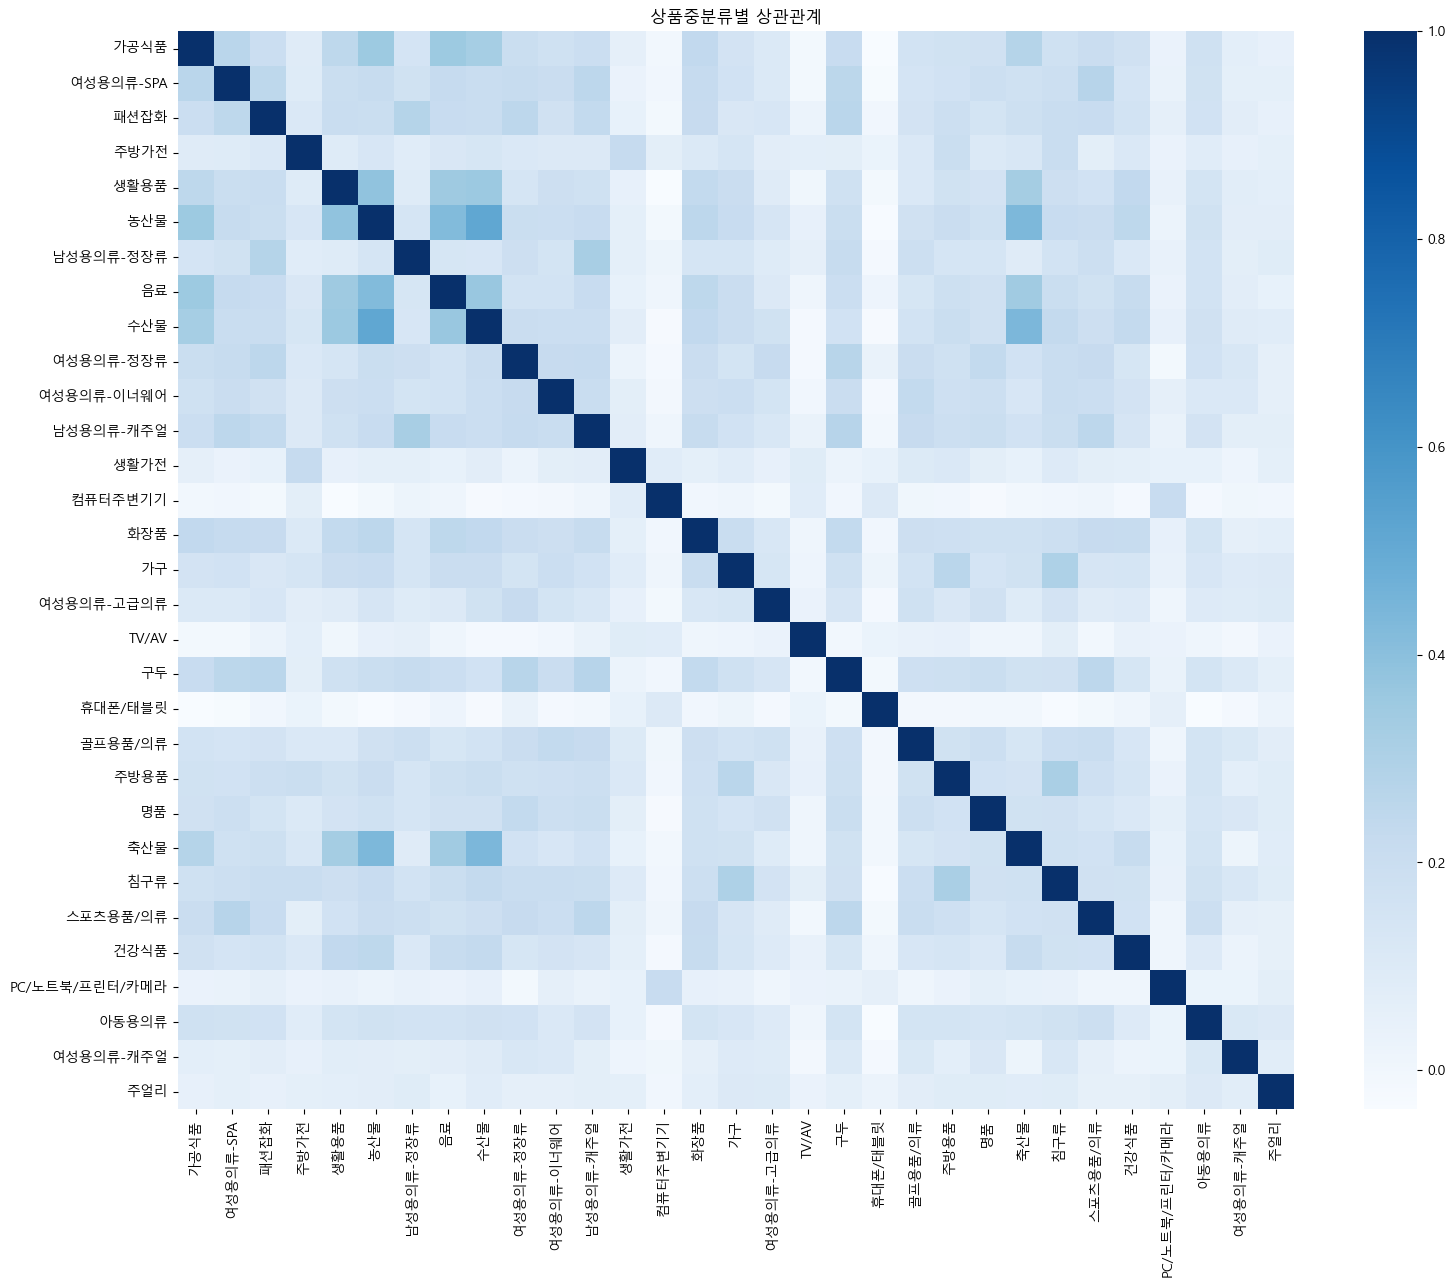

In [46]:
# 제품분류간 상관관계 heatmap
figure = plt.subplots(figsize=(18,14))
sns.heatmap(data1.corr(), cmap='Blues')
plt.title('상품중분류별 상관관계')
plt.show()

### -  Occupation 특성

In [47]:
# 연,월,요일
silver_low['Year'] = silver_low['구매일자'].dt.year
silver_low['Month'] = silver_low['구매일자'].dt.month
silver_low['Weekday'] =silver_low['구매일자'].dt.weekday

C:\Users\wodnj\AppData\Local\Temp\ipykernel_37352\2858951926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  silver_low['Year'] = silver_low['구매일자'].dt.year
C:\Users\wodnj\AppData\Local\Temp\ipykernel_37352\2858951926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  silver_low['Month'] = silver_low['구매일자'].dt.month
C:\Users\wodnj\AppData\Local\Temp\ipykernel_37352\2858951926.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

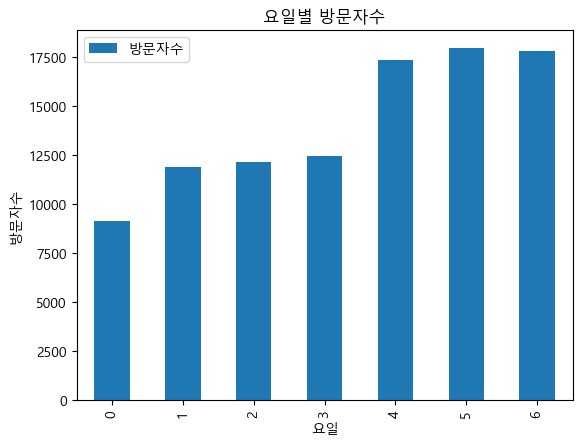

In [48]:
# 요일별 방문자수 카운팅
silver_low.groupby('Weekday')['ID'].agg([('방문자수','count')]).plot.bar()
plt.title("요일별 방문자수")
plt.xlabel("요일")
plt.ylabel("방문자수")
plt.show()

In [49]:
# 요일별 성별별 구매금액 합산
df=pd.pivot_table(silver_low, index='Weekday', columns='성별', values='구매금액', aggfunc=np.sum, fill_value=0)
df

C:\Users\wodnj\AppData\Local\Temp\ipykernel_37352\3413540242.py:2: FutureWarning: The provided callable <function sum at 0x000001DF50304360> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df=pd.pivot_table(silver_low, index='Weekday', columns='성별', values='구매금액', aggfunc=np.sum, fill_value=0)


성별,남성,여성
Weekday,,
0,171818000,551333000
1,183032000,696465000
2,171298000,704118000
3,152343000,722920000
4,248075000,1181995000
5,311075000,1203165000
6,275245000,1067663000


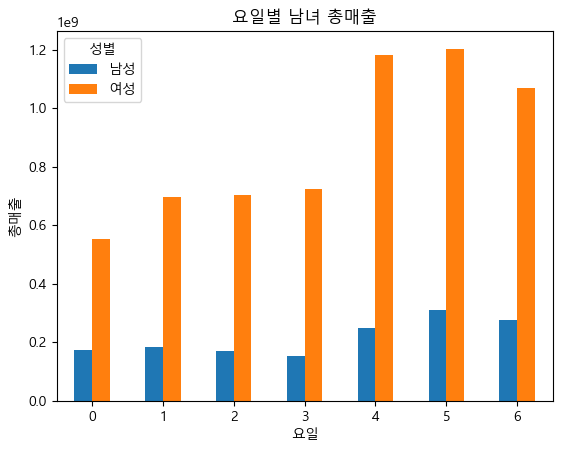

In [50]:
# 요일별 성별별 구매금액 시각화
df.plot(kind='bar', rot=0, stacked = False)
plt.title("요일별 남녀 총매출")
plt.xlabel("요일")
plt.ylabel("총매출")
plt.show()